In [1]:
"""
Name: con_parameter_scan.ipynb
Authors: Stephan Meighen-Berger
Example for a parameter scan
"""

'\nName: con_parameter_scan.ipynb\nAuthors: Stephan Meighen-Berger\nExample for a parameter scan\n'

In [2]:
# General imports
import numpy as np
import matplotlib.pyplot as plt
import sys

In [4]:
# Adding path to module
sys.path.append("../")

In [5]:
# picture path
PICS = '../pics/'

In [6]:
# Module imports
from contagion import Contagion, config

In [7]:
# Creating a fourth_day object
mean_interactions_arr = [0., 0.4, 0.6, 1.]
results = []
results_R = []
for mean_interactions in mean_interactions_arr:
    config['mean social circle interactions'] = mean_interactions
    contagion = Contagion()
    # Storing the solutions
    contagion.sim()
    results.append(contagion.statistics['infections'])
    results_R.append(contagion.R0)

In [8]:
# Plotting standards
std_size = 10.
fontsize = 20.
lw=3.
h_length=1.

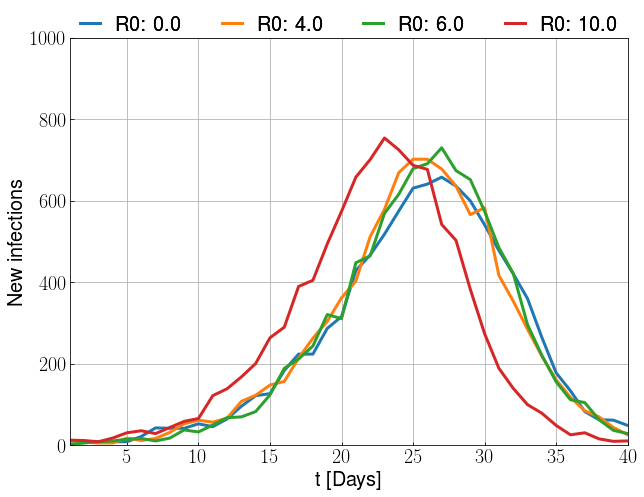

In [11]:
# Infections per time step
figure, ax = plt.subplots(figsize=(std_size, std_size * 6. / 8.))
colors = ['#fdcc8a',
          '#fc8d59',
          '#d7301f']
for i, mean_interactions in enumerate(mean_interactions_arr):
    ax.plot(contagion.t, results[i],
            lw=lw, label='R0: %.1f' %results_R[i])
ax.set_xlim(1e0, 40)
ax.set_ylim(0., 1000)
ax.set_xscale('linear')
ax.set_yscale('linear')
ax.set_xlabel(r't [Days]', fontsize=fontsize)
ax.set_ylabel(r'New infections', fontsize=fontsize)
ax.tick_params(axis = 'both', which = 'major', labelsize=fontsize, direction='in')
ax.tick_params(axis = 'both', which = 'minor', labelsize=fontsize, direction='in')
h, l = ax.get_legend_handles_labels()
lgd1 = ax.legend(h,l, loc=9, bbox_to_anchor=(0.5, +1.1),
                 ncol=4, fontsize=fontsize, handlelength=h_length,
                 fancybox=True, frameon=False)
ax.add_artist(lgd1)
plt.grid(True)
plt.show()

In [12]:
figure.savefig(PICS + "Contagion_Contact_Rate_Scan.png",
               bbox_inches='tight')